**NAME: SAVERA SHAH**

**ROLLNO: 22F-BSAI-103**

# **ASSIGNMNET NO 02**


**Scenario:**

You are working as a data scientist for a healthcare analytics company. You have been
provided with a dataset containing anonymized patient data. Your task is to clean the data,
visualize it, analyze statistical relationships, and simulate a basic health-related system
using First Order ODEs.


# **Load Dataset**

patient_data.csv

In [474]:

from google.colab import files
uploaded = files.upload()


Saving 6848284eb0b11patient_data.rar to 6848284eb0b11patient_data (4).rar


In [475]:
# Step 3: Extract the .rar archive
import rarfile
import os

# Get uploaded filename
rar_path = list(uploaded.keys())[0]

# Extract to current directory
with rarfile.RarFile(rar_path) as rf:
    rf.extractall()
    print("Files extracted:", rf.namelist())


Files extracted: ['patient_data.csv']


In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [477]:
df = pd.read_csv("patient_data.csv")
df.head()


,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


**Convert categorical data columns into numaric data columns**

In [478]:
from sklearn .preprocessing import LabelEncoder
df_encoded=df.copy()
le = LabelEncoder()

df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])

df_encoded['Region'] = le.fit_transform(df_encoded['Region'])

df_encoded['RiskCategory']= le.fit_transform (df_encoded['RiskCategory'])

df_encoded.head()

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,1,37,193.4,129.4,0,0
1,2,0,45,210.7,107.1,3,1
2,3,1,63,244.3,103.9,3,1
3,4,1,53,184.5,127.2,3,0
4,5,1,29,175.7,116.6,2,0


# **Q1: Outlier Detection and Feature Reduction (2 Marks)**
- Use VarianceThreshold to remove constant features (if any).
- Detect and remove outliers from CholesterolLevel using any method of choice.
- Replace any missing values.


**1.Use VarianceThreshold to remove constant features (if any).**

In [479]:
from sklearn.feature_selection import VarianceThreshold

X = df.drop(columns=['PatientID', 'RiskCategory'])
y = df['RiskCategory']


In [480]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(
    x ,y,test_size=0.3,random_state=0)

In [481]:
ver_thers=VarianceThreshold(threshold=0)
ver_thers.fit(x_train)

VarianceThreshold(threshold=0)

In [482]:
constant_columns= [
    column for column in x_train.columns
    if column not in x_train.columns[ver_thers.get_support()]
]

In [483]:
if len(constant_columns)>0:
  for i in constant_columns:
    print(i)
else:
  print("no constant columns")

no constant columns


In [484]:
df.head()

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


**2. Detect and remove outliers from CholesterolLevel using any method of choice.**

In [485]:
sorted(df['CholesterolLevel'])
len (sorted(df['CholesterolLevel']))

100

In [486]:
# using interquartile

q1,q3 =np .percentile(df['CholesterolLevel'],[25,75])
q1,q3

(np.float64(179.425), np.float64(216.17499999999998))

In [487]:
iqr= q3-q1
iqr

np.float64(36.74999999999997)

In [488]:
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

In [489]:
print(lower_bound)
print(upper_bound)

124.30000000000005
271.29999999999995


In [490]:
outliers=[]

for i in df['CholesterolLevel']:
  if i<lower_bound or i>upper_bound:
    outliers.append(i)



In [491]:
outliers

[273.9, 281.6]

Remove outlier

In [492]:
f=df[(df['CholesterolLevel']>=lower_bound) & (df['CholesterolLevel']<=upper_bound)]

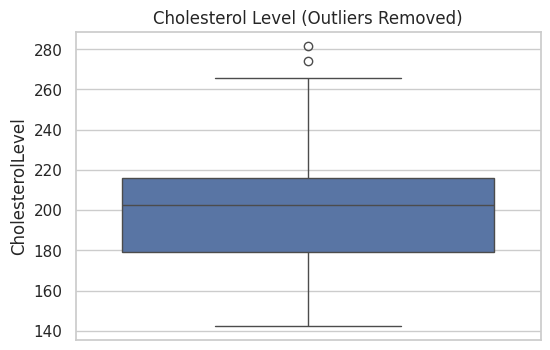

In [493]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['CholesterolLevel'])
plt.title("Cholesterol Level (Outliers Removed)")
plt.show()

In [494]:
# by using zscore
data=df['CholesterolLevel']


def detect_outliers(data):
  thershold=3
  mean=np.mean(df['CholesterolLevel'])
  std=np.std(df['CholesterolLevel'])
  outliers=[]

  for i in df['CholesterolLevel']:
    z_score=(i-mean)/std
    if np.abs(z_score) > thershold:
      outliers.append(i)
  return outliers


In [495]:
found_outliers=detect_outliers(data)

In [496]:
if found_outliers:
  print("outlier found",found_outliers)
else:
  print("not found")

not found


**3.  Replace any missing values.**

In [432]:
df=df.fillna(df.median(numeric_only=True))

In [434]:
print("cleaned Dataset after Q1:")
print(df.head())

cleaned Dataset after Q1:
   PatientID  Gender  Age  CholesterolLevel  BloodPressure Region RiskCategory
0          1    Male   37             193.4          129.4   East         High
1          2  Female   45             210.7          107.1   West          Low
2          3    Male   63             244.3          103.9   West          Low
3          4    Male   53             184.5          127.2   West         High
4          5    Male   29             175.7          116.6  South         High


# **Q2: Data Visualization (2 Marks)**
- Generate a box plot comparing BloodPressure between different RiskCategory levels.
- Create a count plot showing the number of patients in each RiskCategory per Region.

**1. Generate a box plot comparing BloodPressure between different RiskCategory levels.**

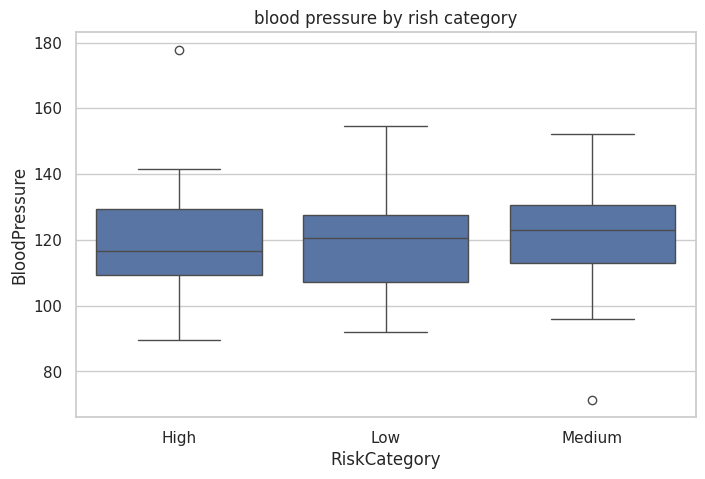

In [500]:
import seaborn as sns
import matplotlib.pyplot as pd

sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
sns.boxplot(x='RiskCategory', y='BloodPressure', data=df)
plt.title('blood pressure by rish category')
plt.xlabel('RiskCategory')
plt.ylabel('BloodPressure')
plt.show()

**2. Create a count plot showing the number of patients in each RiskCategory per Region.**

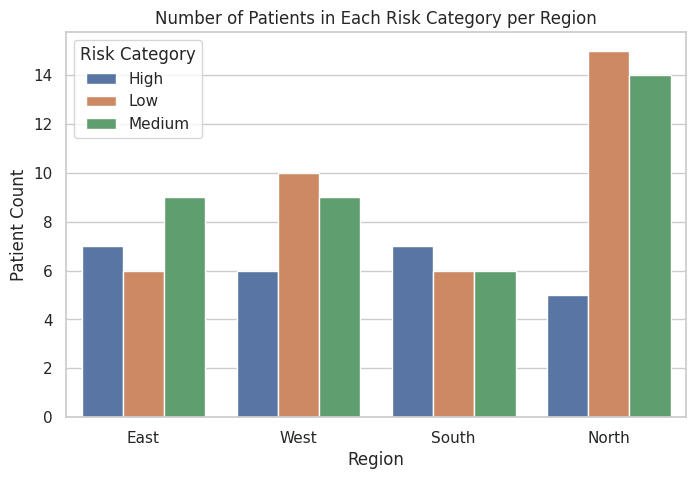

In [501]:
plt.figure(figsize=(8,5))
sns.countplot(x='Region',hue='RiskCategory' ,data=df)
plt.title('Number of Patients in Each Risk Category per Region')
plt.xlabel('Region')
plt.ylabel('Patient Count')
plt.legend(title='Risk Category')

# **Q3: Statistical Hypothesis Testing (3 Marks)**
**Perform the following:**

- Is the average CholesterolLevel significantly different from 200 mg/dL having a sample
size of 20?
- Is there a significant relationship between Region and RiskCategory?

Include:
- Null and alternative hypotheses
- Test statistic, p-value
- Your interpretation (reject/fail to reject H₀)

**1. Is the average CholesterolLevel significantly different from 200 mg/dL having a sample**


Include:
- Null and alternative hypotheses
- Test statistic, p-value
- Your interpretation (reject/fail to reject H₀)

In [441]:
# ho=mu=200
# ha= mu != 200
#  means 2 tail

In [502]:
mean=df['CholesterolLevel'].mean()
mean

np.float64(201.77699999999996)

In [503]:
popmean= 200  # mu

In [504]:
sample_size=20
sample=np.random.choice(df['CholesterolLevel'],sample_size)

In [505]:
sample

array([229.1, 190.3, 234.3, 162.9, 175.5, 192.1, 175.7, 184.5, 201.8,
       224.4, 200.2, 208.9, 153.5, 177.4, 200.2, 172.4, 223.6, 223.7,
       202.1, 177.4])

In [506]:
import scipy.stats as stats
t_statistic,p_value= stats.ttest_1samp(sample,popmean)

In [507]:
p_value

np.float64(0.3988245616768302)

In [508]:
if p_value < 0.05:
    print("Reject the null hypothesis. ")
else:
    print("Fail to reject the null hypothesis. ")

Fail to reject the null hypothesis. 


In [509]:
#  ho is correct mu=200 , thatswhy fail to reject null ho

In [510]:
t_statistic

np.float64(-0.8631413067937179)

In [511]:
from scipy import stats

sample_size = 20
alpha = 0.05
dfree = sample_size - 1
t_critical = stats.t.ppf(1 - alpha/2, df=dfree)
neg_t_critical = -t_critical

if neg_t_critical < t_statistic < t_critical:
    print("fail to reject the null hypothesis")
else:
    print("reject the null hypothesis")


fail to reject the null hypothesis


**2. Is there a significant relationship between Region and RiskCategory?**

In [512]:
import pandas as pd

In [513]:
df.head()

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


In [515]:
contigency_table =pd.crosstab(df['Region'], df['RiskCategory'])
contigency_table

RiskCategory,High,Low,Medium
Region,,,
East,7,6,9
North,5,15,14
South,7,6,6
West,6,10,9


In [516]:
chi2 , p_value , df , expected_value= stats.chi2_contingency(contingency_table)

In [517]:
print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", df)
print("P-value:", p_value)

Chi-square Statistic: 4.8246822108149345
Degrees of Freedom: 6
P-value: 0.5664877563797075


In [518]:
print("expected_value", expected_value)

expected_value [[ 5.16326531  8.30612245  8.53061224]
 [ 7.74489796 12.45918367 12.79591837]
 [ 4.2244898   6.79591837  6.97959184]
 [ 5.86734694  9.43877551  9.69387755]]


In [519]:
alpha=0.05
if p_value < alpha:
  print("reject the null hypothesis")
else:
  print("fail to reject the null hypothesis")

fail to reject the null hypothesis


# **Q4: Modeling a Health System with ODE (3 Marks)**

**Model the progression of a patient's medication in the bloodstream
Equation:**

dC/dt = k(D - C)

Where:
- k = 0.1, D = 100, C(0) = 0
- Solve this ODE for t = 0 to 50 using both odeint and solve_ivp
- Plot the result and explain the difference in output between the two solvers, if any.

In [524]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint , solve_ivp

In [525]:
k= 0.1
d= 100
c0 = 0
t =np.linspace(0,50,200)
def dCdt(C , t):
    return k*(d-C)
sol1 = odeint(dCdt , c0 , t )

def dCdt_ivp( t, C):
    return k*(d-C)
sol2 = solve_ivp(dCdt_ivp , y0=[c0] , t_span=(0,50), t_eval=t)
c_sol2=sol2.y[0]

In [526]:
sol1 = sol1.T[0]
sol1

array([ 0.        ,  2.48126068,  4.9009548 ,  7.26061   ,  9.561716  ,
       11.80572556, 13.99405539, 16.12808705, 18.20916784, 20.23861159,
       22.21769955, 24.14768119, 26.02977496, 27.86516906, 29.65502225,
       31.40046452, 33.10259781, 34.76249674, 36.38120925, 37.95975728,
       39.49913742, 41.00032153, 42.46425735, 43.8918691 , 45.28405809,
       46.64170325, 47.96566171, 49.25676932, 50.51584117, 51.74367213,
       52.9410374 , 54.10869291, 55.24737584, 56.35780509, 57.44068169,
       58.49668928, 59.52649457, 60.53074772, 61.51008275, 62.46511792,
       63.39645618, 64.30468551, 65.19037931, 66.05409673, 66.89638307,
       67.71777009, 68.51877636, 69.29990758, 70.0616569 , 70.80450523,
       71.52892155, 72.23536322, 72.92427623, 73.59609551, 74.25124521,
       74.89013893, 75.51318003, 76.12076186, 76.713268  , 77.29107252,
       77.8545402 , 78.40402678, 78.93987914, 79.46243561, 79.97202607,
       80.46897226, 80.95358795, 81.42617907, 81.88704398, 82.33

In [527]:
c_sol2

array([ 0.        ,  2.48126078,  4.90095513,  7.26061019,  9.56171598,
       11.80577425, 13.99437916, 16.12885347, 18.21046968, 20.24047908,
       22.22011171, 24.1505764 , 26.03306076, 27.86873116, 29.65873276,
       31.40418946, 33.10620399, 34.7658578 , 36.38421115, 37.96230306,
       39.50115132, 41.00175251, 42.46508196, 43.8920938 , 45.28372093,
       46.64087499, 47.96444645, 49.25530451, 50.51429717, 51.74234239,
       52.94030089, 54.10883117, 55.2485818 , 56.36019302, 57.44429676,
       58.5015166 , 59.53246785, 60.53775743, 61.517984  , 62.47373785,
       63.40560097, 64.31414703, 65.19994137, 66.063541  , 66.90549461,
       67.72634259, 68.52661698, 69.3068415 , 70.06753157, 70.80919426,
       71.53232832, 72.2374242 , 72.92496401, 73.59542154, 74.24926225,
       74.88694329, 75.50891348, 76.11561333, 76.707475  , 77.28492234,
       77.84837092, 78.3982201 , 78.93477311, 79.45829583, 79.96905178,
       80.46730215, 80.9533058 , 81.42731923, 81.88959662, 82.34

In [528]:
print("Max difference:", np.max(np.abs(sol1 - c_sol2)))


Max difference: 0.013269694719667768


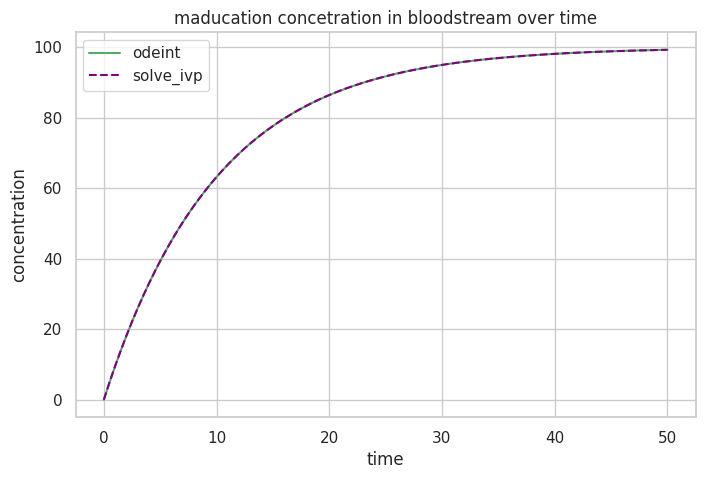

In [529]:
plt.figure(figsize=(8,5))
plt.plot( t , sol1 , label= 'odeint' , linestyle='-' ,color='g')
plt.plot(t , c_sol2 , label='solve_ivp' , linestyle='--', color='purple')
plt.title("maducation concetration in bloodstream over time")
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.grid(True)
plt.show()